https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [60]:
# import os

# os.environ['MKL_NUM_THREADS'] = '1'
# os.environ['OPENBLAS_NUM_THREADS'] = '1'

In [61]:
import pandas as pd
# import cartopy.crs as ccrs
# import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

dfTotalCount = pd.read_csv(url)

In [63]:
dfTotalCount

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,413,414,414,418,418,422,426,428,428,429
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,102,119,120,124,124,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,"Dane, WI",US,43.0186,-89.5498,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
343,"Pierce, WI",US,44.7509,-92.3814,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
344,"Cuyahoga, OH",US,41.4339,-81.6758,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
345,"Weber, UT",US,41.2603,-111.9522,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
countryLabel = 'Netherlands'
# countryLabel = 'Mainland China'

country = dfTotalCount[dfTotalCount['Country/Region']==countryLabel]
subset = country.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
# pd.DataFrame(data=df[df['Country/Region']=='Poland'],)

In [65]:
print(subset.values[0])
subset.columns
# print(subset.)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   1   6  10  18  24  38  82 128 188 265 321 382]


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20'],
      dtype='object')

In [66]:
reports = pd.DataFrame(data=subset.transpose(),index = subset.columns)

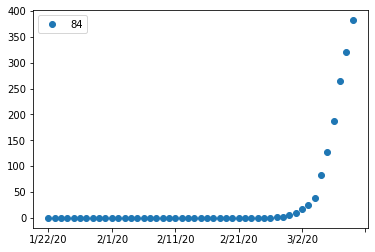

In [67]:
reports.plot(style='o')

In [68]:
x_train = np.linspace(0,subset.values[0].shape[0]-1,subset.values[0].shape[0]).reshape(-1, 1)
y_train = subset.values[0].reshape(-1, 1)

x_pred = np.linspace(0,99,100).reshape(-1, 1)

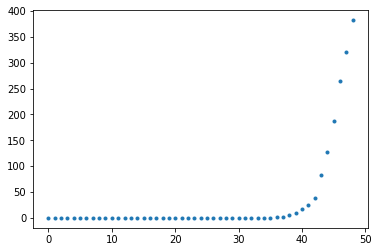

In [69]:
start_ind =35
plt.plot(x_train,y_train,'.')

## SKLEARN

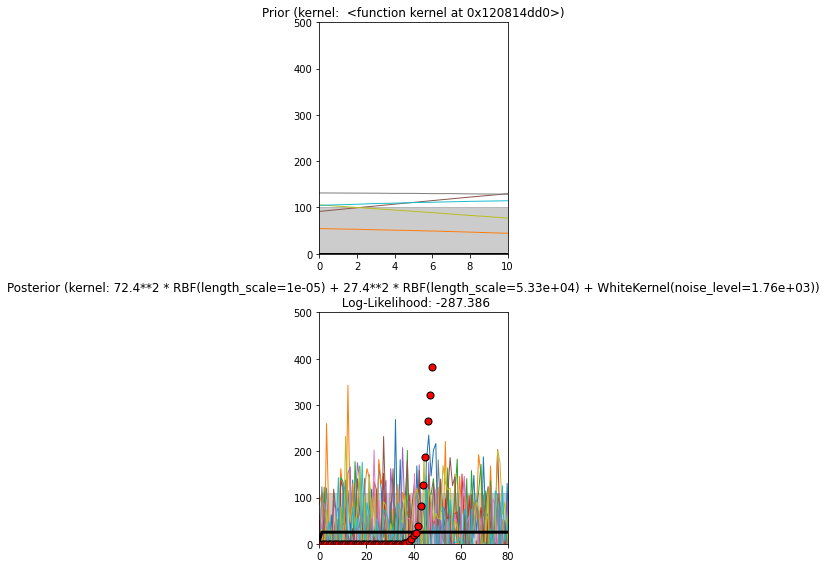

In [70]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)


# Kernel with parameters given in GPML book
k1 = 100**2 * RBF(length_scale=50.0)  # long term smooth rising trend
# k2 = 2.4**2 * RBF(length_scale=90.0) \
#     * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# # medium term irregularity
# k3 = 0.66**2 \
#     * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.01**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.1**2)  # noise terms
kernel_gpml = k1 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml)#, alpha=0, optimizer=None, normalize_y=True)

# Plot prior
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
# X_ = np.linspace(0, 5, 100)
X_ = x_train.ravel()
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.xlim(0, 10)
plt.ylim(0, 5e2)
plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

y = y_train.ravel()#np.sin((X[:, 0] - 2.5) ** 2)
gp.fit(X_[:, np.newaxis], y)

X_ = np.linspace(0,100,100)

# Plot posterior
plt.subplot(2, 1, 2)
# X_ = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')

y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.scatter(x_train, y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.xlim(0, 80)
plt.ylim(0, 5e2)
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
          % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
          fontsize=12)
plt.tight_layout()

plt.show()

## PyMC3

In [71]:
# x_train=np.arange(10)[:,None]
# y_train=np.ones(10)[:,None]

# x_train = np.linspace(-3,3,20)[:,None]
# y_train = np.random.poisson(np.sin(x_train*10)**2).astype(float)[:,None]

In [72]:
import pymc3 as pm
import arviz as az
import warnings
cov = pm.gp.cov
warnings.simplefilter('ignore')

with pm.Model() as invicted_model:
    ρ = pm.HalfNormal('ρ', sigma = 5 )
    η = pm.HalfNormal('η', sigma = 3 )
#     d = pm.HalfNormal('d', 1)
#     c = pm.HalfNormal('c', 1)
#     o = pm.Normal('o', 1)
#     ηq = pm.HalfNormal("ηq", sd=5)
    
#     K = ηq**2 * pm.gp.cov.Polynomial(1, c, 2, o)
    
#     K = η**2 * pm.gp.cov.ExpQuad(1, ρ) + ηq**2 * pm.gp.cov.Polynomial(1, c, 2, o)
    K = η**2 * cov.ExpQuad(1, ρ)# + pm.gp.cov.Polynomial(1, c, 2, o)#* η**2
    gp = pm.gp.Latent(cov_func=K) #Latent as we cannot do closed form.. Posterior is transformed GP
    
with invicted_model:
    f = gp.prior('f', X=x_train)  
    
with invicted_model:
    λ = pm.Deterministic('λ', pm.math.exp(f))
    confirmation = pm.Poisson('confirmation', λ, observed=y_train)    

In [73]:
with invicted_model:
    trace = pm.sample(draws=1000, tune=1000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [f_rotated_, η, ρ]
Sampling 2 chains, 120 divergences: 100%|██████████| 4000/4000 [24:39<00:00,  2.70draws/s]
There were 74 divergences after tuning. Increase `target_accept` or reparameterize.
There were 46 divergences after tuning. Increase `target_accept` or reparameterize.


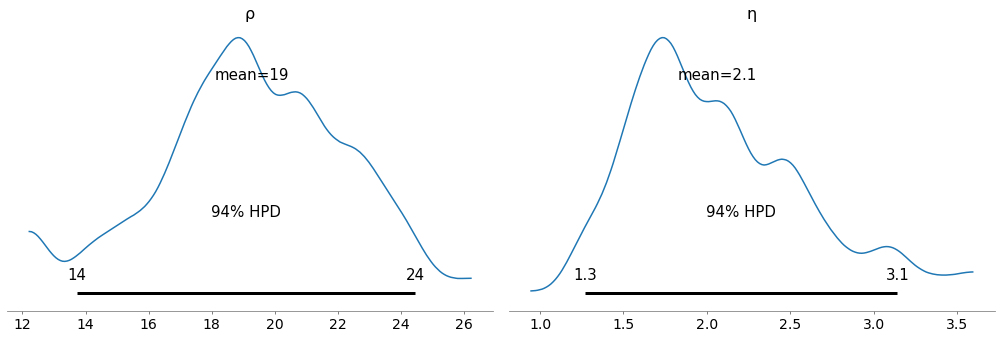

In [89]:
az.plot_posterior(trace, var_names=['ρ', 'η']);

In [90]:
with invicted_model:
    y_pred = pm.sample_posterior_predictive(trace, vars=[f], samples=1000)

100%|██████████| 1000/1000 [00:01<00:00, 721.08it/s]


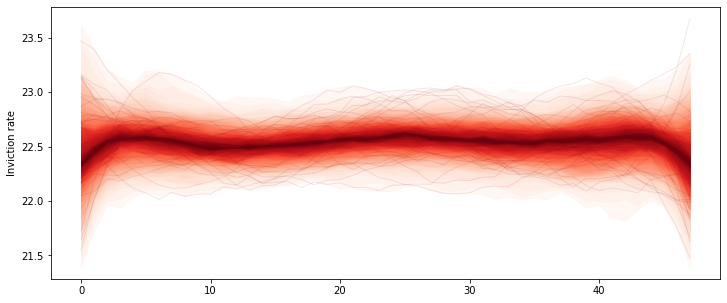

In [93]:
fig, ax = plt.subplots(figsize=(12,5))

pm.gp.util.plot_gp_dist(ax, np.exp(y_pred["f"]), x_train)
sns.regplot(x_train.ravel(), y_train.ravel(), fit_reg=False, ax=ax)
# ax.set_xlim(year.min(), year.max())
ax.set_ylabel('Inviction rate');

NameError: name 'year' is not defined

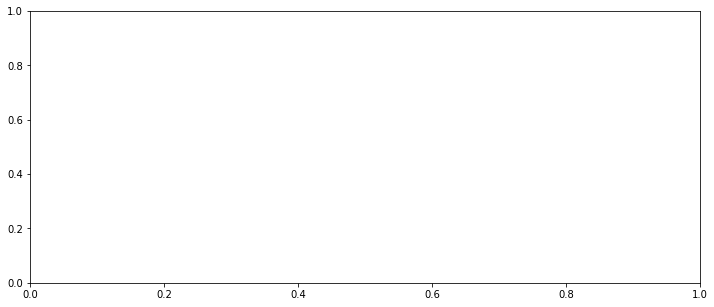

In [92]:
fig, ax = plt.subplots(figsize=(12,5))

pm.gp.util.plot_gp_dist(ax, np.exp(y_pred["f"]), year[:, None])
sns.regplot(year, disasters_data, fit_reg=False, ax=ax)
# ax.set_xlim(year.min(), year.max())
ax.set_ylabel('Disaster rate');

## Scikit - Learn

In [16]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, DotProduct, Exponentiation

# y_pred, sigma = gp.predict(x_pred, return_std=True)
# kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1) + DotProduct()
kernel = ConstantKernel(1.0) * Matern(length_scale=2, nu=3/2)#+ Exponentiation(DotProduct(),3)# + Exponentiation()
kernel = ConstantKernel(.001)* (DotProduct(sigma_0=1) ** 2)

# gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
# gp.fit(x_train, y_train)

gp = gaussian_process.GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
kernel=kernel,
n_restarts_optimizer=0, normalize_y=False,
optimizer='fmin_l_bfgs_b', random_state=None)
# gp.fit(x_train, y_train)

y_pred, sigma = gp.predict(x_pred, return_std=True)

In [17]:
plot_gp(y_pred, np.diag(sigma**2), x_pred, X_train=x_train, Y_train=y_train)

NameError: name 'plot_gp' is not defined

## GPFlow approach

In [74]:
import gpflow
import tensorflow as tf
import numpy as np
import matplotlib
from gpflow.utilities import print_summary, set_trainable, to_default_float
import tensorflow_probability as tfp

In [110]:
# X = np.linspace(-3,3,20)
# # Y = np.asarray(np.random.poisson(np.sin(X*10)**2),dtype=np.double)
# Y = np.random.poisson(np.sin(X*10)**2).astype(float)
k = gpflow.kernels.Matern32(1) + gpflow.kernels.Bias(1)
l = gpflow.likelihoods.Poisson()
m = gpflow.models.GPMC(data=(x_data, y_data), kernel=k, likelihood=l)
m.kernel.kernels[0].variance.prior = tfp.distributions.Gamma(
    to_default_float(1), to_default_float(1))
m.kernel.kernels[0].lengthscale.prior = tfp.distributions.Gamma(
    to_default_float(1), to_default_float(1))
m.kernel.kernels[1].variance.prior = tfp.distributions.Gamma(
    to_default_float(1), to_default_float(1))
# m.kernel.kernels[0].lengthscale.assign(1.) #gpflow.priors.Gamma(1., 1.)
# m.kernel.kernels[0].variance.assign(1.) #gpflow.priors.Gamma(1.,1.)
# m.kernel.kernels[1].variance.assign(1.) #gpflow.priors.Gamma(1.,1.)

opt = gpflow.optimizers.Scipy()

# @tf.function(autograph=False)
def objective_closure():
    return - m.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,m.trainable_variables,options=dict(maxiter=15))
        
print_summary(m, fmt='notebook')
# m.optimize(maxiter=15) # start near MAP
# samples = m.sample(500, verbose=True, epsilon=0.12, Lmax=15)

name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Gamma,True,(),float64,2.310315090476279
GPMC.kernel.kernels[0].lengthscale,Parameter,Softplus,Gamma,True,(),float64,0.04849643685685559
GPMC.kernel.kernels[1].variance,Parameter,Softplus,Gamma,True,(),float64,0.06348951035874548
GPMC.V,Parameter,,Normal,True,"(20, 1)",float64,[[-1.98611866e-03...


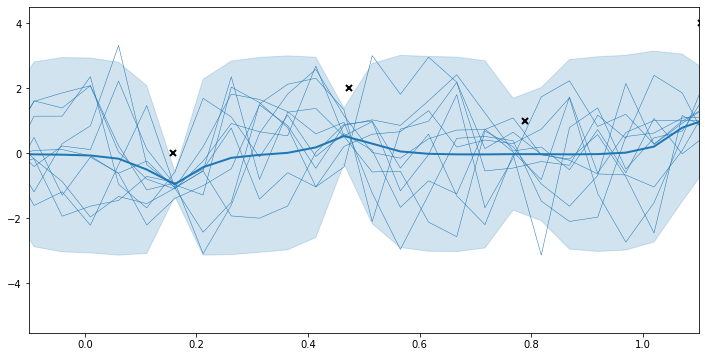

In [111]:
## generate test points for prediction
xx = np.linspace(-1, 4, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(xx)

## generate 10 samples from posterior
samples = m.predict_f_samples(xx, 10)  # shape (10, 100, 1)

## plot
plt.figure(figsize=(12, 6))
plt.plot(X, Y, 'kx', mew=2)
plt.plot(xx, mean, 'C0', lw=2)
plt.fill_between(xx[:,0],
                 mean[:,0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:,0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)

plt.plot(xx, samples[:, :, 0].numpy().T, 'C0', linewidth=.5)
plt.xlim(-0.1, 1.1);

In [19]:
m.kernel.kernels[0]

name,class,transform,prior,trainable,shape,dtype,value
Matern32.variance,Parameter,Softplus,,True,(),float64,1131.84
Matern32.lengthscale,Parameter,Softplus,,True,(),float64,2.12222e-144


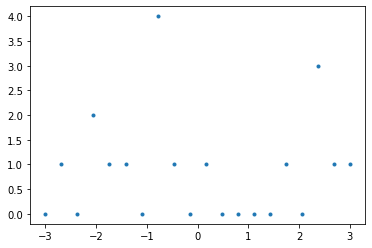

In [21]:
plt.plot(X,Y,'.')

## Numpy approach 

In [59]:
# from gaussian_processes_util import plot_gp

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes 
    a covariance matrix from points in X1 and X2.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        Covariance matrix (m x n).
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

def plot_gp_2D(gx, gy, mu, X_train, Y_train, title, i):
    ax = plt.gcf().add_subplot(1, 2, i, projection='3d')
    ax.plot_surface(gx, gy, mu.reshape(gx.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)
    ax.scatter(X_train[:,0], X_train[:,1], Y_train, c=Y_train, cmap=cm.coolwarm)
    ax.set_title(title)


# # Finite number of points
# X = np.arange(30, 100, 0.2).reshape(-1, 1)

# # Mean and covariance of the prior
# mu = np.zeros(X.shape)
# cov = kernel(X, X)

# # Draw three samples from the prior
# samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

# # Plot GP mean, confidence interval and samples 
# plot_gp(mu, cov, X, samples=samples)

from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
    Computes the suffifient statistics of the GP posterior predictive distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s
    
    
# Noise free training data
# X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
# Y_train = np.sin(X_train)
X_train = np.linspace(0,subset.values[0].shape[0]-1,subset.values[0].shape[0]).reshape(-1, 1)
Y_train = subset.values[0].reshape(-1, 1)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)    

AxisError: axis 1 is out of bounds for array of dimension 1

In [98]:
cov_s.shape

(350, 350)

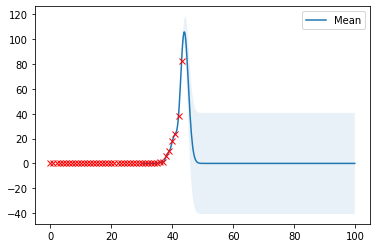

In [62]:
from numpy.linalg import cholesky
from scipy.optimize import minimize


noise = 0.01

def nll_fn(X_train, Y_train, noise):
    '''
    Returns a function that computes the negative log-likelihood
    for training data X_train and Y_train and given noise level.
    
    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        
    Returns:
        Minimization objective.
    '''
    def step(theta):
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        # Compute determinant via Cholesky decomposition
        return np.sum(np.log(np.diagonal(cholesky(K)))) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)
    return step

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.
res = minimize(nll_fn(X_train, Y_train, noise), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B',)

# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x
l_opt, sigma_f_opt

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

----

## 2D input

In [1]:
import os.path
from os import path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

date = '10032020' # started from 03032020
vgzfile = 'klik_corona' + date + '.csv'
vgzurl = 'https://www.volksgezondheidenzorg.info/sites/default/files/map/detail_data/' + vgzfile
if not path.exists('data/' +vgzfile):
    !wget $vgzurl -P data/

In [4]:
df_NL = pd.read_csv('data/'+vgzfile,delimiter=';')

gemeenten = pd.read_csv('data/gemeenten.csv')
gemeenten = gemeenten.rename(columns={"NAAM": "Gemeente"})

df_NL['Aantal'] = df_NL['Aantal'].str.replace(",", ".").astype(float)
df_NL = df_NL.fillna(0)
# df_NL = df_NL['Aantal'].astype(float)
df_NL['Aantal'].sum()

dfNL = df_NL.merge(gemeenten,on='Gemeente')

In [5]:
dfNL.sort_values('Aantal',ascending=False)

,id,Gemeente,Indicator,Aantal,Provincie,KML,Lat,Lon
280,855,Tilburg,Aantal gevallen,29.0,Noord-Brabant,<MultiGeometry><Polygon><coordinates>5.1449384...,51.580027,5.068324
47,758,Breda,Aantal gevallen,27.0,Noord-Brabant,<MultiGeometry><Polygon><coordinates>4.7875060...,51.585121,4.761442
248,599,Rotterdam,Aantal gevallen,15.0,Zuid-Holland,<MultiGeometry><Polygon><coordinates>4.2195288...,51.921310,4.477692
289,344,Utrecht,Aantal gevallen,14.0,Utrecht,<MultiGeometry><Polygon><coordinates>5.1070929...,52.091138,5.074754
145,321,Houten,Aantal gevallen,13.0,Utrecht,<MultiGeometry><Polygon><coordinates>5.2431906...,52.004095,5.181715
...,...,...,...,...,...,...,...,...
142,118,Hoogeveen,Aantal gevallen,0.0,Drenthe,<MultiGeometry><Polygon><coordinates>6.5874674...,52.723094,6.513593
141,1911,Hollands Kroon,Aantal gevallen,0.0,Noord-Holland,<MultiGeometry><Polygon><coordinates>5.1041483...,52.830033,4.949781
140,1735,Hof van Twente,Aantal gevallen,0.0,Overijssel,<MultiGeometry><Polygon><coordinates>6.7428865...,52.236441,6.589959
138,402,Hilversum,Aantal gevallen,0.0,Noord-Holland,<MultiGeometry><Polygon><coordinates>5.2011171...,52.223261,5.167948


In [6]:
## Create map

In [7]:
#BBox = (gemeenten.Lon.min(), gemeenten.Lon.max(), gemeenten.Lat.min(), gemeenten.Lat.max())

In [8]:
BBox=((3.0006408691406254,7.325906753540039,50.69414695350509,53.79928213877752))

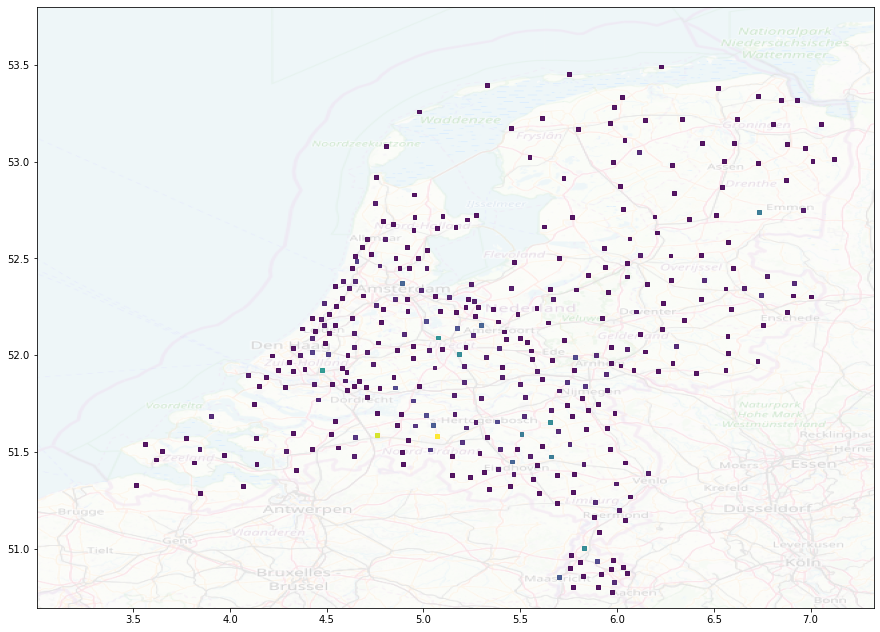

In [9]:
fig, ax = plt.subplots(figsize = (15,15))

ax.scatter(dfNL.Lon, dfNL.Lat, zorder=1, alpha= 0.9, c=dfNL.Aantal, s=15, marker='s',cmap=plt.cm.viridis)
# ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
nlMap = plt.imread('figures/mapNetherlands.png')
ax.imshow(nlMap, zorder=0, extent = BBox, aspect= 'equal',alpha=.2)
# plt.colormap()
# plt.axes('equal')

In [ ]:
X_obs = dfNL[['Lon', 'Lat']].values
y_obs = dfNL['Aantal'].values

----

In [46]:
import gpflow
from gpflow.utilities import print_summary, set_trainable, to_default_float
import tensorflow_probability as tfp

# X = np.linspace(-3,3,20)
# Y = np.random.poisson(np.sin(X*10)**2)
k = gpflow.kernels.Matern32(1) + gpflow.kernels.Bias(1)
l = gpflow.likelihoods.Poisson()
m = gpflow.models.GPMC(data=(X_obs, y_obs), kernel=k, likelihood=l)

m.kernel.kernels[0].variance.prior = tfp.distributions.Gamma(
    to_default_float(1), to_default_float(1))
m.kernel.kernels[0].lengthscale.prior = tfp.distributions.Gamma(
    to_default_float(1), to_default_float(1))
m.kernel.kernels[1].variance.prior = tfp.distributions.Gamma(
    to_default_float(1), to_default_float(1))

# m.kern.matern32.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
# m.kern.matern32.variance.prior = gpflow.priors.Gamma(1.,1.)
# m.kern.bias.variance.prior = gpflow.priors.Gamma(1.,1.)
# m.optimize(maxiter=15) # start near MAP
# samples = m.sample(500, verbose=True, epsilon=0.12, Lmax=15)

opt = gpflow.optimizers.Scipy()

# @tf.function(autograph=False)
def objective_closure():
    return - m.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,m.trainable_variables)#,options=dict(maxiter=15))
        
print_summary(m, fmt='notebook')

name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Gamma,True,(),float64,0.9993320864342473
GPMC.kernel.kernels[0].lengthscale,Parameter,Softplus,Gamma,True,(),float64,0.9993765696561341
GPMC.kernel.kernels[1].variance,Parameter,Softplus,Gamma,True,(),float64,0.9994424981300486
GPMC.V,Parameter,,Normal,True,"(350, 1)",float64,[[4.54465853e-02...


In [45]:
## generate test points for prediction
xx = np.linspace(-1, 4, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(Xnew=np.mean(X_obs,axis=0))

# ## generate 10 samples from posterior
# samples = m.predict_f_samples(xx, 10)  # shape (10, 100, 1)

InvalidArgumentError: Inputs to operation AddN of type AddN must have the same size and shape.  Input 0: [350] != input 1: [350,2] [Op:AddN]

In [44]:
Xnew

array([ 5.4054636 , 52.06864378])

-----

In [10]:
# N = y_obs.shape[0]
# y_obs_n = y_obs+1e-4*np.random.randn(N,1)

In [11]:
# %matplotlib inline
# import numpy as np
# # import pandas as pd
import pymc3 as pm
# # import arviz as az
# import matplotlib.pyplot as plt
# import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [18]:
nd = 30
xu1, xu2 = np.meshgrid(np.linspace(BBox[0], BBox[1], nd), np.linspace(BBox[2], BBox[3], nd))
Xu = np.concatenate([xu1.reshape(nd*nd, 1), xu2.reshape(nd*nd, 1)], 1)

In [19]:
with pm.Model() as spatial_model:
    
    l = pm.HalfCauchy("l", beta=4, shape=(2,))
    sf2 = pm.HalfCauchy("sf2", beta=1)
#     sn2 = pm.HalfCauchy("sn2", beta=1)
#     σ = pm.HalfCauchy("σ", beta=1)

    K = pm.gp.cov.ExpQuad(2, l) * sf2 ** 2
    
    gp_spatial = pm.gp.MarginalSparse(cov_func=K, approx="FITC")
#     gp_spatial = pm.gp.Marginal(cov_func=K)
    obs = gp_spatial.marginal_likelihood("obs", X=X_obs, Xu=Xu, y=y_obs, noise=0)
#     obs = gp_spatial.marginal_likelihood("obs", X=X_obs, y=y_obs_n, noise=σ)

    mp = pm.find_MAP()

/Users/henkkortier/.local/share/virtualenvs/schoolofai_gp_tutorial-VgFG4FjU/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/henkkortier/.local/share/virtualenvs/schoolofai_gp_tutorial-VgFG4FjU/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/henkkortier/.local/share/virtualenvs/schoolofai_gp_tutorial-VgFG4FjU/lib/python3.7/site-packages/theano/tensor/basic.py:6611:

In [20]:
mp

{'l_log__': array([-5.02480886,  1.61219961]),
 'sf2_log__': array(1.18677619),
 'l': array([0.00657284, 5.01382755]),
 'sf2': array(3.27650136)}

In [21]:
nd = 50
z1, z2 = np.meshgrid(np.linspace(BBox[0], BBox[1], nd), np.linspace(BBox[2], BBox[3], nd))
Z = np.concatenate([z1.reshape(nd*nd, 1), z2.reshape(nd*nd, 1)], 1)

In [22]:
with spatial_model:
    
    
    f_pred = gp_spatial.conditional('f_pred', Z)
    
    samples = pm.sample_posterior_predictive([mp], vars=[f_pred], samples=100)

  1%|          | 1/100 [00:56<1:34:01, 56.99s/it]


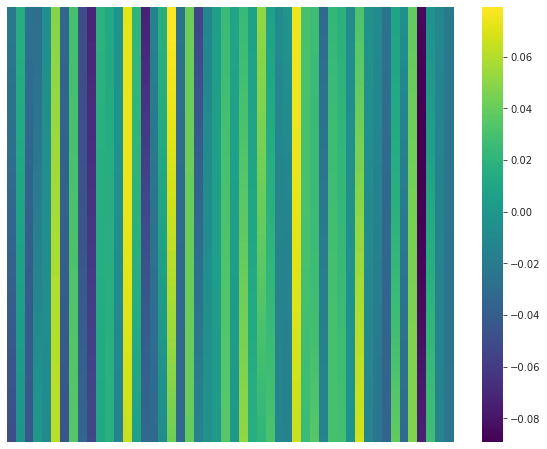

In [23]:
with sns.axes_style("white"):

    plt.figure(figsize=(10,8))
    ax = sns.heatmap(samples['f_pred'].mean(0).reshape(nd, nd), cmap='viridis',alpha=1)
    ax.invert_yaxis()
    ax.set_yticklabels([])
    ax.set_xticklabels([])

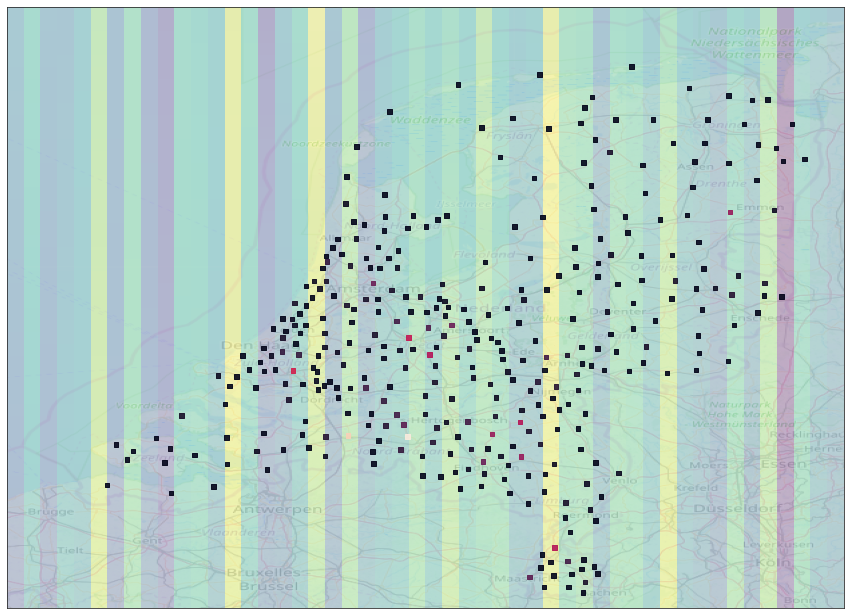

In [24]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (15,15))
    ax.scatter(dfNL.Lon, dfNL.Lat, zorder=1, alpha= 0.9, c=dfNL.Aantal, s=20, marker='s')
#     ax2 = sns.heatmap(samples['f_pred'].mean(0).reshape(nd, nd), cmap='viridis',alpha=1)
#     sns.heatmap(samples['f_pred'].mean(0).reshape(nd, nd), cmap='viridis',alpha=1)
    ax.imshow(samples['f_pred'].mean(0).reshape(nd, nd),extent=BBox, origin='lower',cmap='viridis',alpha=.4)
#     ax.invert_yaxis()
#     ax.set_title('Plotting Spatial Data on Riyadh Map')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    nlMap = plt.imread('figures/mapNetherlands.png')
    ax.imshow(nlMap, zorder=0, extent = BBox, aspect= 'equal',alpha=.2)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

In [19]:
plt.savefig('./figures/latent_rate_gaussLIK.png')

<Figure size 432x288 with 0 Axes>

---

Model as Cox Process

In [16]:
# import warnings
# warnings.filterwarnings('ignore')
import pymc3 as pm
cov = pm.gp.cov

D=2
with pm.Model() as model:

    #Gaussian Process
#     cov_func = pm.gp.cov.ExpQuad(D, ls=0.1*np.ones(D))
#     gp = pm.gp.Latent(cov_func=cov_func)
    
    ρ = pm.HalfNormal('ρ', sigma = 1 )
#     η = pm.HalfNormal('η', sigma = 1 )

    K = 1 * cov.ExpQuad(input_dim=D, ls=ρ)# + pm.gp.cov.Polynomial(1, c, 2, o)#* η**2
    gp = pm.gp.Latent(cov_func=K) #Latent as we cannot do closed form.. Posterior is transformed GP
    
    f = gp.prior('f', X=X_obs)

#     obs = pm.Poisson('obs', mu=tt.exp(f), observed=y_obs)
    λ = pm.Deterministic('λ', pm.math.exp(f))
    confirmation = pm.Poisson('confirmation', λ, observed=y_obs) 

In [17]:
with model:
    trace = pm.sample()#draws=10, tune=1000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/henkkortier/.local/share/virtualenvs/schoolofai_gp_tutorial-VgFG4FjU/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/henkkortier/.local/share/virtualenvs/schoolofai_gp_tutorial-VgFG4FjU/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/henkkortier/.local/share/virtualenvs/schoolofai_g

ValueError: Not enough samples to build a trace.

In [ ]:
#num_bins = 

ftrace = np.mean(trace['f'][500::2,:], axis=0)
ftrace = np.reshape(ftrace, (num_bins, num_bins))
latent_rate = np.exp(ftrace)

In [ ]:
plt.figure()
plt.imshow(latent_rate)
plt.savefig('./figures/latent_ratePoissonLIK.png')

In [ ]:


# # Downloaded from http://biogeo.ucdavis.edu/data/gadm2/shp/DEU_adm.zip
# fname = '/downloads/DEU/DEU_adm1.shp'

# adm1_shapes = list(shpreader.Reader(fname).geometries())

# ax = plt.axes(projection=ccrs.PlateCarree())

# plt.title('Deutschland')
# ax.coastlines(resolution='10m')

# ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', facecolor='gray', alpha=0.5)

# ax.set_extent([4, 16, 47, 56], ccrs.PlateCarree())

# plt.show()